##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
import pandas as pd
import numpy 
import pylab as pl
import statsmodels.formula.api as smf
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [3]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may 
#be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [4]:
#REMOVE
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

exploratory phase

In [5]:
#lest see what is in the data
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(...

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [6]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)    

/Users/ianina/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [7]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/ianina/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

/Users/ianina/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


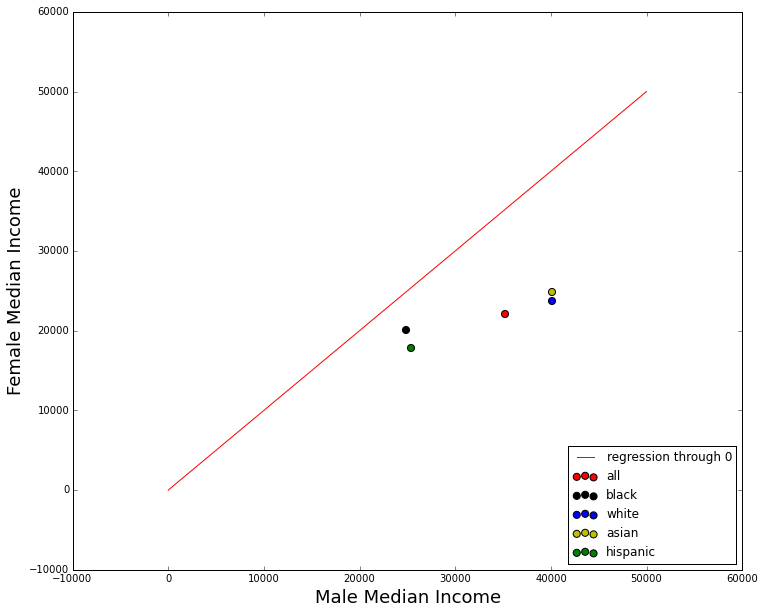

In [8]:
pl.figure(figsize=(12,10))
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1],s=50,c='r', label='all')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],s=50,c='k', label='black')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],s=50,c='b', label='white')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],s=50,c='y', label='asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1],s=50,c='g', label='hispanic')
pl.xlabel('Male Median Income', size=18)
pl.ylabel('Female Median Income', size=18)
x=np.linspace(0,50000,1000)
y=x
pl.plot(x, y, color='red',label = 'regression through 0')
pl.legend(loc=4)

## Plot of Female Median Income vs. Male Median Income for 4 races
###From the graph above we can see that for all races, the median income of female is lower than that of male.

Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [9]:
male_median=[allmales['all']['Median income'][1],allmales['white']['Median income'][1],
             allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],
             allmales['asian']['Median income'][1]]
female_median=[allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],
               allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],
               allfemales['asian']['Median income'][1]]
data=pd.DataFrame({'x':male_median,'y':female_median})
model1 = smf.ols(formula='y ~ x', data = data).fit()
model1.summary()

/Users/ianina/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Mon, 19 Oct 2015   Prob (F-statistic):             0.0176
Time:                        23:44:51   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9989.8444   2508.397      3.983      0.028      2007.007   1.8e+04
x              0.3531      0.074      4.764      0.018         0.117     0.589
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.258
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.362
Skew:                           0.164   Prob(JB):                        0.835
Kurtosis:                       1.724   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

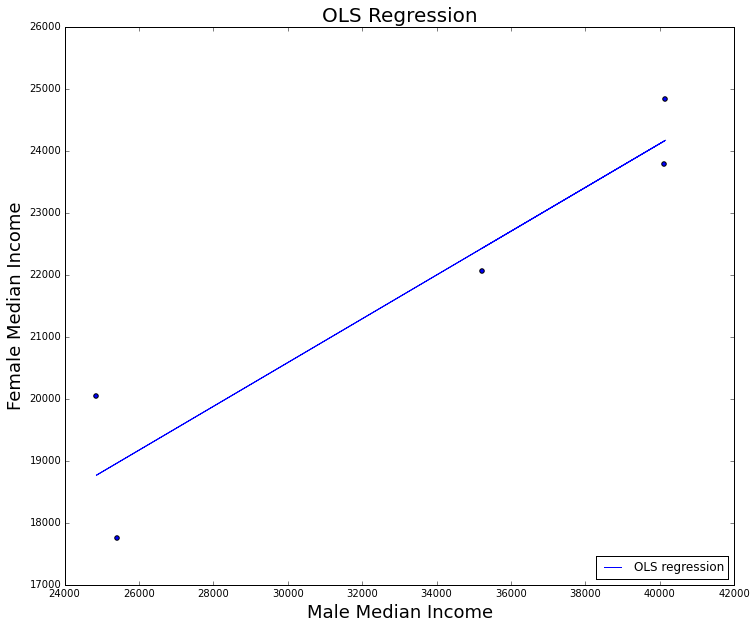

In [10]:
pl.figure(figsize=(12,10))
pl.scatter(male_median, female_median)
pl.plot(male_median, model1.predict(),color = 'blue',label = 'OLS regression')
pl.xlabel('Male Median Income', size=18)
pl.ylabel('Female Median Income', size=18)
pl.title('OLS Regression', size =20)
pl.legend(loc=4)

it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula!

In [11]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(male_median, female_median)
beta1=cor[0]*np.std(female_median)/np.std(male_median)
beta0=np.mean(female_median)-beta1*np.mean(male_median)

and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

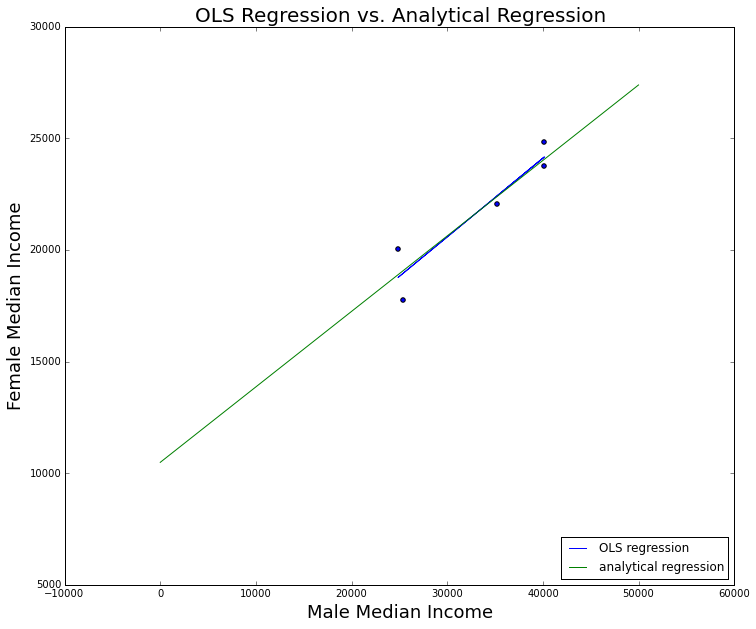

In [12]:
y2 = beta0 + beta1 * x
pl.figure(figsize=(12,10))
pl.scatter(male_median, female_median)
pl.plot(male_median, model1.predict(),label = 'OLS regression',color ='blue')
pl.plot(x,y2,label = 'analytical regression',color ='green')
pl.xlabel('Male Median Income', size=18)
pl.ylabel('Female Median Income', size=18)
pl.title('OLS Regression vs. Analytical Regression', size =20)
pl.legend(loc=4)

this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used ny.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [13]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']
                                      ['Median income'][:].values,allmales['black']['Median income'][:].values,
                                      allmales['hispanic']['Median income'][:].values,allmales['asian']
                                      ['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']
                                        ['Median income'][:].values,allfemales['black']['Median income'][:].values,
                                        allfemales['hispanic']['Median income'][:].values,allfemales['asian']
                                        ['Median income'][:].values]).flatten())

#I am gonna create the mask in the next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]
all_females.mask = allmask
all_males.mask = allmask

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           7.21e-77
Time:                        23:44:51   Log-Likelihood:                -1668.8
No. Observations:                 178   AIC:                             3342.
Df Residuals:                     176   BIC:                             3348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1493.0394    351.359      4.249      0.0

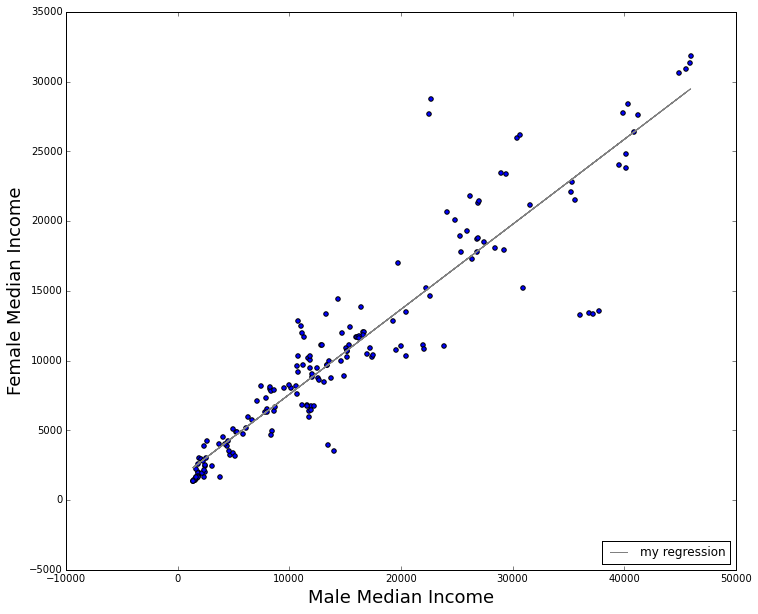

In [14]:
#fit and plot [...]
male1=all_males[all_males.mask==False]
female1=all_females[all_females.mask==False]
data=pd.DataFrame({'x':male1,'y':female1})
model2 = smf.ols(formula='y ~ x', data = data).fit()
print model2.summary()
pl.figure(figsize=(12,10))
pl.scatter(male1, female1)
pl.plot(male1, model2.predict(),label='my regression',color = 'grey')
pl.xlabel('Male Median Income', size=18)
pl.ylabel('Female Median Income', size=18)
pl.legend(loc=4)

In [15]:
#is the line fit similar? can you find any high legverage points?

### Comment
The R-square value is higher than the previous model, hence this line fit is more similar.

Some potential high leverage points might be the ones nearby (37000,125000) and (22000,27000)


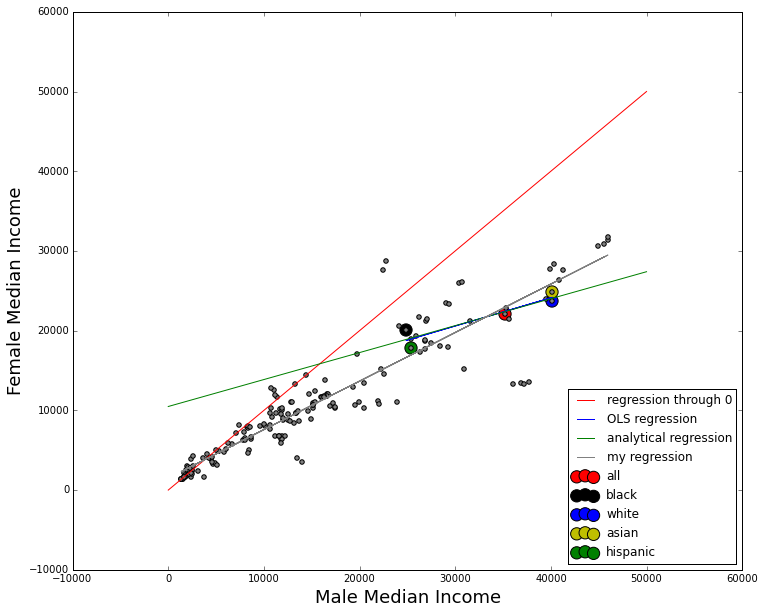

In [16]:
pl.figure(figsize=(12,10))
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1],s=150,c='r', label='all')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1],s=150, c='k', label='black')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1],c='b',s=150, label='white')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1],c='y', s=150,label='asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1],c='g',s=150, label='hispanic')
pl.scatter(male1, female1, c ='grey', s =20)
x=np.linspace(0,50000,1000)
y=x
pl.plot(x, y,label = 'regression through 0',color='red')
pl.plot(male_median, model1.predict(),label = 'OLS regression',color='blue')
pl.plot(x,y2,label = 'analytical regression',color ='green')
pl.plot(male1, model2.predict(),label='my regression',color ='grey')
pl.xlabel('Male Median Income', size=18)
pl.ylabel('Female Median Income', size=18)
pl.legend(loc=4)

Now pick a stipend, maybe your ideal stipend? 
and predict what a woman in a position where a man recieves your ideal stipend would make

In [17]:
stipend = 30000
female = stipend * model2.params[1] + model2.params[0] 
print female

19763.6551497


lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

### Comment
From the data plots we can conclude that for all races, women's incomes are lower than men. ANOVA can be run to test if there exists any differences between two races.